In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing

In [2]:
import pandas as pd
import sklearn
from sklearn import tree

import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
from sklearn import preprocessing 
%matplotlib inline
from matplotlib import pyplot

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Validation DataFrame

In [4]:
validation = pd.read_csv('Final_Validation_Pivot.csv')
validation

,Neighborhood,numBusinesses,Closed,Open,Total confirmed,% Confirmed (E/B)
0,Astoria/LIC,893.0,1,277,278.0,31.1%
1,Bed-Stuy,763.0,0,42,42.0,5.5%
2,Bed-Stuy/Bushwick,177.0,0,3,3.0,1.7%
3,Bushwick,372.0,0,12,12.0,3.2%
4,Chelsea,2485.0,0,0,0.0,0.0%
5,Elmhurst,231.0,0,5,5.0,2.2%
6,Flushing,458.0,0,53,53.0,11.6%
7,Greenpoint,229.0,7,93,100.0,43.7%
8,Harlem,398.0,0,54,54.0,13.6%
9,Inwood,193.0,0,0,0.0,0.0%


In [5]:
##remove the % sign and turn the %confirmed column into a numeric column
cols = ['numBusinesses', 'Closed', 'Open', 'Total confirmed',
       '% Confirmed (E/B)']
validation = validation.dropna()
validation['% Confirmed (E/B)'] = validation['% Confirmed (E/B)'].str[:-1]
validation['% Confirmed (E/B)'] = pd.to_numeric(validation['% Confirmed (E/B)'])
validation[cols] = validation[cols].apply(pd.to_numeric)

In [6]:
validation = validation[validation['Total confirmed'] != 0]
validation = validation.reset_index(drop=True)
# df.reset_index(drop=True)

In [7]:
validation['validation'] = validation['Closed'] / validation['Total confirmed']
# validation['validation_opened'] = validation['Closed'] / validation['Total confirmed']
# validation = validation.fillna(0)
validation

,Neighborhood,numBusinesses,Closed,Open,Total confirmed,% Confirmed (E/B),validation
0,Astoria/LIC,893.0,1,277,278.0,31.1,0.003597
1,Bed-Stuy,763.0,0,42,42.0,5.5,0.000000
2,Bed-Stuy/Bushwick,177.0,0,3,3.0,1.7,0.000000
3,Bushwick,372.0,0,12,12.0,3.2,0.000000
4,Elmhurst,231.0,0,5,5.0,2.2,0.000000
5,Flushing,458.0,0,53,53.0,11.6,0.000000
6,Greenpoint,229.0,7,93,100.0,43.7,0.070000
7,Harlem,398.0,0,54,54.0,13.6,0.000000
8,Jackson Heights,259.0,0,30,30.0,11.6,0.000000
9,LES,583.0,0,8,8.0,1.4,0.000000


## Neighborhood Profile DataFrame

In [8]:
NeighborhoodProfile = pd.read_csv('Neighborhood Profile Dashboard.csv')

In [9]:
## merge validation percentages into final df
NeighborhoodProfile = NeighborhoodProfile.merge(validation, on='Neighborhood')
NeighborhoodProfile

,Neighborhood,BusinessLoss,StaffCancellation,Venuesper1K,OLS_PCT,Variety,neg,neu,pos,numBusinesses,Closed,Open,Total confirmed,% Confirmed (E/B),validation
0,Astoria/LIC,3.090371,1.0,5.132095,0.021481,63.640,0.071,0.709,0.220,893.0,1,277,278.0,31.1,0.003597
1,Bed-Stuy,2.821002,1.0,3.661439,0.051981,62.500,0.045,0.704,0.251,763.0,0,42,42.0,5.5,0.000000
2,Bed-Stuy/Bushwick,2.988672,1.0,2.206102,0.057593,57.780,0.059,0.681,0.260,177.0,0,3,3.0,1.7,0.000000
3,Williamsburg/Bushwick/Bed-Stuy,1.915323,1.0,2.632366,0.052532,60.715,0.051,0.684,0.265,220.0,2,15,17.0,7.7,0.117647
4,Bushwick,2.783998,1.0,2.603383,0.050364,50.000,0.047,0.684,0.270,372.0,0,12,12.0,3.2,0.000000
5,Elmhurst,2.100000,1.0,1.689708,0.020624,62.500,0.076,0.737,0.187,231.0,0,5,5.0,2.2,0.000000
6,Flushing,2.000000,1.0,2.557559,0.025751,25.000,0.046,0.693,0.261,458.0,0,53,53.0,11.6,0.000000
7,Greenpoint,1.559534,1.0,6.305934,0.059767,59.030,0.048,0.701,0.251,229.0,7,93,100.0,43.7,0.070000
8,Harlem,1.753004,1.0,2.474555,0.044175,56.250,0.042,0.707,0.250,398.0,0,54,54.0,13.6,0.000000
9,Jackson Heights,2.304738,1.0,3.886788,0.037430,61.905,0.054,0.711,0.235,259.0,0,30,30.0,11.6,0.000000


## Decision Tree DataFrame

In [10]:
##create new df and only keep select columns
DecisionTreeDF = NeighborhoodProfile[['Neighborhood', 'BusinessLoss', 'StaffCancellation', 'Venuesper1K',
       'OLS_PCT', 'Variety','validation']]
DecisionTreeDF

,Neighborhood,BusinessLoss,StaffCancellation,Venuesper1K,OLS_PCT,Variety,validation
0,Astoria/LIC,3.090371,1.0,5.132095,0.021481,63.640,0.003597
1,Bed-Stuy,2.821002,1.0,3.661439,0.051981,62.500,0.000000
2,Bed-Stuy/Bushwick,2.988672,1.0,2.206102,0.057593,57.780,0.000000
3,Williamsburg/Bushwick/Bed-Stuy,1.915323,1.0,2.632366,0.052532,60.715,0.117647
4,Bushwick,2.783998,1.0,2.603383,0.050364,50.000,0.000000
5,Elmhurst,2.100000,1.0,1.689708,0.020624,62.500,0.000000
6,Flushing,2.000000,1.0,2.557559,0.025751,25.000,0.000000
7,Greenpoint,1.559534,1.0,6.305934,0.059767,59.030,0.070000
8,Harlem,1.753004,1.0,2.474555,0.044175,56.250,0.000000
9,Jackson Heights,2.304738,1.0,3.886788,0.037430,61.905,0.000000


## Decision Tree Leave One Out Analysis

In [11]:
# Let's take "validation" as the target variable. 
y=(DecisionTreeDF.iloc[:,-1])
X=DecisionTreeDF.iloc[:,1:6]

In [12]:
# Leave One Out splits
loo = LeaveOneOut()
loo.get_n_splits(X) #there are 14 data records

14

In [13]:
X = X.to_numpy()
y = y.to_numpy()

In [14]:
#iterate through 14 leave-one-out iterations
#iteration will then provide the best-fit max-depth value to create the final tree
IS_acc = []
y_predict = []
y_true = []
best_param = []
OS_acc= []
IS_acc_formula = []
for train_index, test_index in loo.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    # test/train splits
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    # parameter selection and model fitting
    param_grid ={'max_depth':range(1,5)}
    dt=DecisionTreeRegressor()#, max_leaf_nodes = 7)
    gr=GridSearchCV(dt,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    y_predict.append(rs.predict(X_test))
    y_true.append(y_test)
    IS_acc.append(rs.score(X_train, y_train))
    IS_acc_formula.append(1-((rs.predict(X_train)-y_train)**2).mean()/y_train.var())
    best_param.append(rs.best_params_)
    #OS_acc.append(1-(y_predict-y_test)**2).mean()/y_test.var()
    OS_acc.append(rs.score(X_test, y_test))

In [17]:
best_param # optimal max depth for each of 14 iterations

[{'max_depth': 1},
 {'max_depth': 1},
 {'max_depth': 4},
 {'max_depth': 2},
 {'max_depth': 1},
 {'max_depth': 3},
 {'max_depth': 3},
 {'max_depth': 3},
 {'max_depth': 1},
 {'max_depth': 1},
 {'max_depth': 4},
 {'max_depth': 3},
 {'max_depth': 1},
 {'max_depth': 4}]

In [21]:
#extract depth values from dictionary embedded in list
x = list(map(lambda x: x["max_depth"], best_param))

In [26]:
#function to obtain values
def Average(depth): 
    return sum(depth) / len(depth)

In [29]:
#average the max_depth values from the list to determine ovreall depth of final Decision Tree
average = round(Average(x))
#average is the value to be used for max depth
average

2

## Final Decision Tree

In [30]:
# Let's take "validation" as the target variable. 
y=(DecisionTreeDF.iloc[:,-1])
X=DecisionTreeDF.iloc[:,1:6]

In [31]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth = average, random_state = 999)
dt.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=999, splitter='best')

In [32]:
#accuracy score for Decision Tree
dt.score(X,y)

0.9183365345932746

In [33]:
#Obtain Feature Importance
Feature_importance=pd.DataFrame([list(X.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
3,OLS_PCT,0.659061
4,Variety,0.326949
0,BusinessLoss,0.0139897
1,StaffCancellation,0
2,Venuesper1K,0


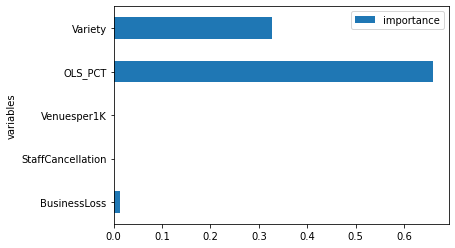

In [34]:
#fig, ax = plt.subplots() #get axis to plot on

Feature_importance.plot.barh(x='variables')

In [35]:
import os

env_var = 'C:\Program Files (x86)\Graphviz2.38\bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

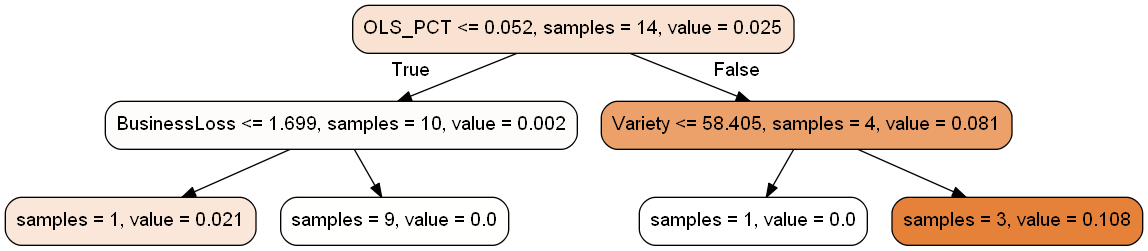

In [36]:
from sklearn import tree
from IPython.display import Image

import pydotplus
# your code here

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  
# print (thestring)